# National Bureau of Economic Research (NBER)

According to its website, NBER was founded in 1920 and is a private, non-profit, non-partisan organization dedicated to conducting economic research and to disseminating research findings among academics, public policy makers, and business professionals. NBER-affiliated researchers study a wide range of topics and they employ many different methods in their work. Key focus areas include developing new statistical measurements, estimating quantitative models of economic behavior, and analyzing the effects of public policies.

This notebook exemplifies what can be done from the scraped data. It's not an attempt to provide causal explanations. Instead, I'm just providing descriptive trends. Both code and data are open (see: [<strong>github.com/ledwindra/nber</strong>](https://github.com/ledwindra/nber). Feel free to modify this if you find it useful. 🍻

In [1]:
# load module and data
import nber_paper

nber = nber_paper.get_data('nber')
repec = nber_paper.get_data('repec')

# Trends over time

First, I would like highlight the trends of published papers in NBER. Currently there are almost 30 thousand working papers available in NBER. We can see below that total published papers per year have been increasing over periods of time from 1973 to 2021.

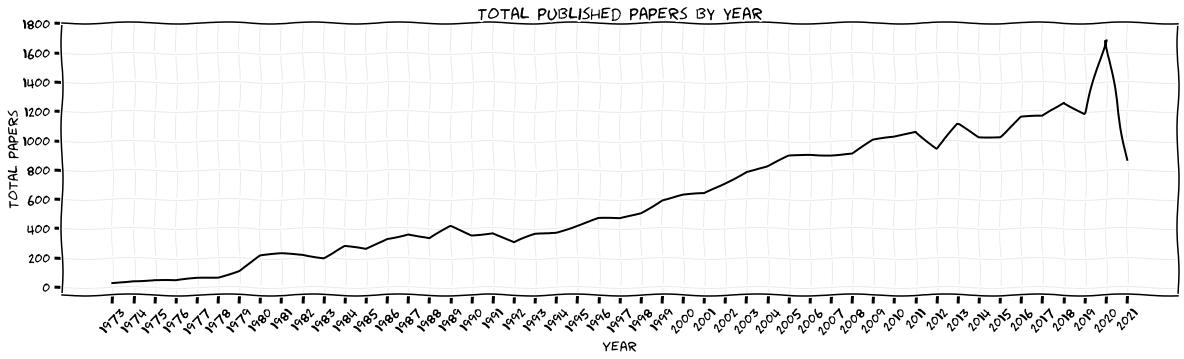

In [2]:
nber_paper.published_paper(nber_paper.count_by_year(nber), 'Total published papers by year', 1, 200, 200)

### Acknowledgements

Next, you might be curious what would economists say in their acknowledgements. Do they thank their collaborators, donors, assistants, etc? Below, we can see there's a skyrocketing numbers starting from 2005. Isn't it interesting? Was it <strong>not</strong> a thing to write such thing in the acknowledgements prior 2005? Or maybe they didn't write one at all?

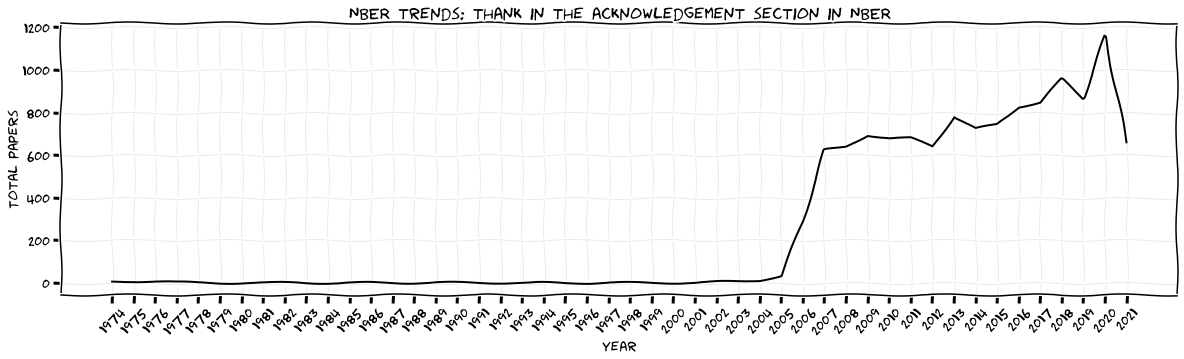

In [3]:
nber_paper.section_trends(nber, 'acknowledgement', 'thank', 'thank', 1, 200, 200)

Here's another good trend among economists that seemed to start in the early 21st century: giving kind words in the acknowledgement, such as <strong>excellent research</strong>. I assume that these days published papers are more collaborative, e.g. by having research assistants. Can you guess who—among economists—say such phrase the most?

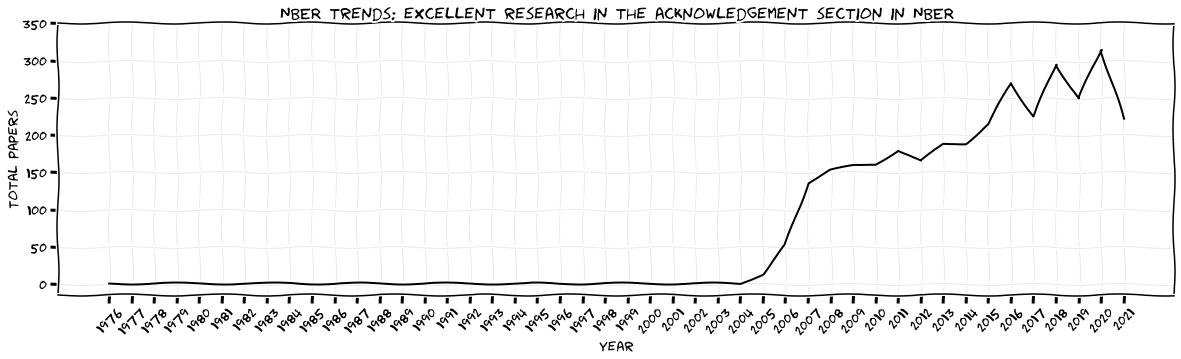

In [4]:
nber_paper.section_trends(nber, 'acknowledgement', 'excellent research', 'excellent research', 1, 50, 50)

Voila! Below are these five economists who say "excellent research" the most in the acknowledgement. Do you know any of them? Are you one of their RAs? 😁

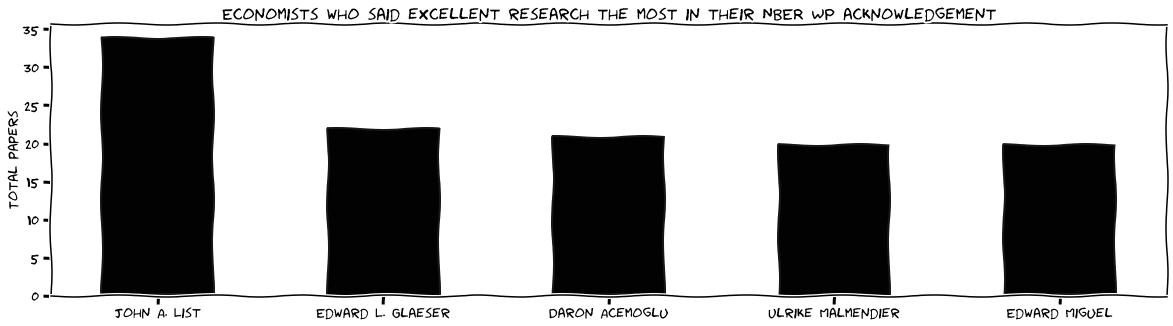

In [5]:
excellent = nber[(nber['acknowledgement'].isna() == False) & (nber['acknowledgement'].str.contains('excellent research'))]
excellent = nber_paper.top_five(excellent,'citation_author').reset_index(drop=True)
nber_paper.bar_plot(excellent, 'Economists', 'Economists who said excellent research the most in their NBER WP acknowledgement', 'citation_author')

Not only that, economists seem to be more transparent about fundings. Again, this is interesting to look at. Why did these trends start relatively at the same time (2005)? Is it mandatory among economists to publish in their NBER working papers?

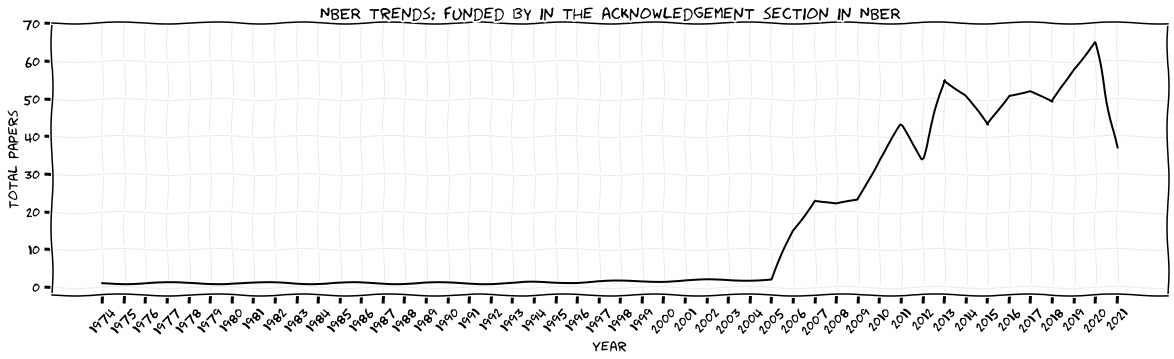

In [6]:
nber_paper.section_trends(nber, 'acknowledgement', 'funded by', 'funded by', 1, 10, 10)

Further investigation about collaborations in economics can be seen below. I am not sure whether it's a good metric to measure collaboration, but here we can see that median total authors per paper in economics are between one and three per year (e.g median authors from 1988 to 2015 were two). Maybe it's not because economics isn't a collaborative field per se, but the collaborators are perhaps not included as the authors.

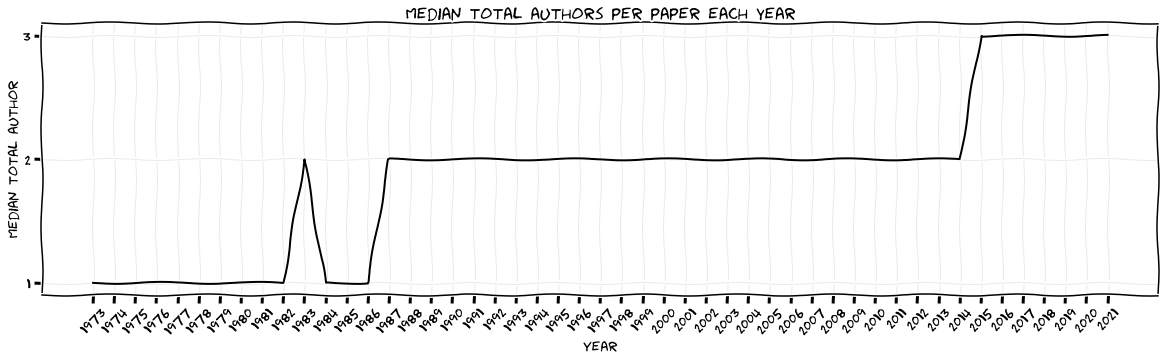

In [7]:
nber_paper.collaboration(nber)

### Abstract

Next thing I would like show is trends in the abstract section. From this, we may get the trends of economics over time. Below we can see the trends of [<strong>development</strong>](https://en.wikipedia.org/wiki/Development_economics). It's interesting to see steady increases from 1973 to 2020.

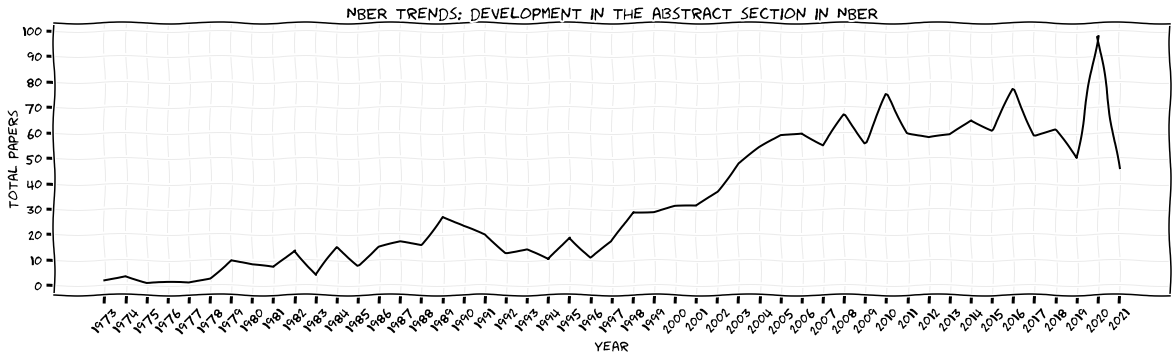

In [8]:
nber_paper.section_trends(nber, 'abstract', 'development', 'development', 1, 10, 10)

We can also see that [<strong>randomized controlled trial<strong>](https://en.wikipedia.org/wiki/Randomized_controlled_trial) as a methodology started to gain traction in the early 21st century. In fact, 2019 Noble Prize winners are one of the pioneers of RCT in the field of economics <strong>#TIL</strong>. 💡

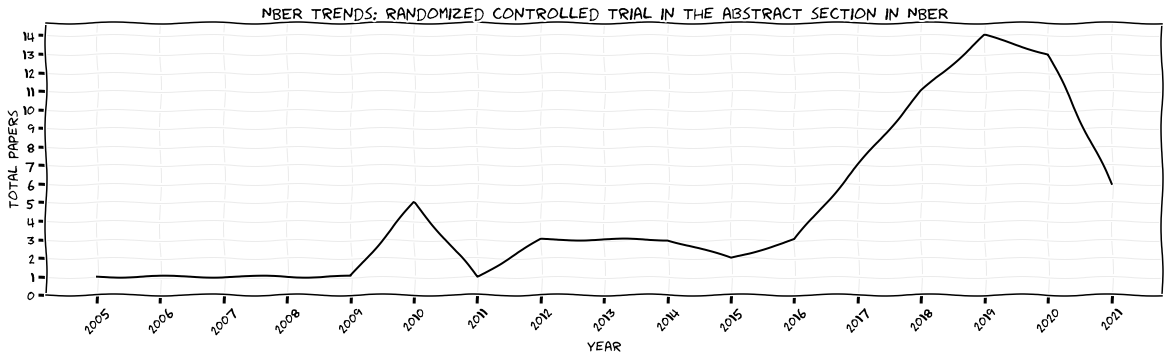

In [9]:
nber_paper.section_trends(nber, 'abstract', 'randomized controlled trial', 'randomized controlled trial', 1, 1)

Even more striking is trends of using <strong>pandemic</strong> in the abstract section. 2020 is hit hard by the COVID-19 pandemic and it looks like economists don't want to miss out a thing. A whopping working papers containing this word are published in 2020 alone!

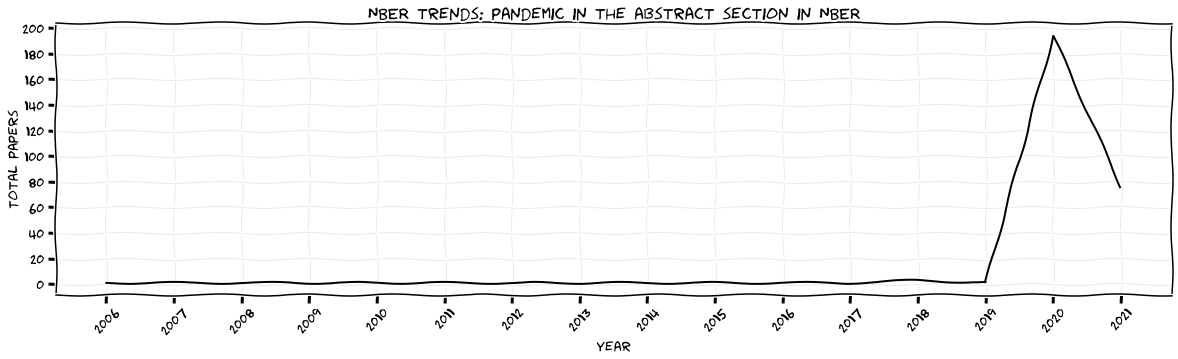

In [10]:
nber_paper.section_trends(nber, 'abstract', 'pandemic', 'pandemic', 1, 20, 20)

# Citations

Networks do play a role in the academia, however big it is. One of the possible measurements is the citations. Below, I present the relationship between citing and being cited. In the horizontal axis, we can see the numbers of cites per paper; and the vertical axis tells us about how many times these papers are cited by other researchers. Note that no causality implied in this graph.

We can see that outliers exist in the citation game. There are a small numbers of papers that are cited over a thousand times despite only citing less than 50! On the other hand, some others cite more than one hundred and are only cited less than 500.

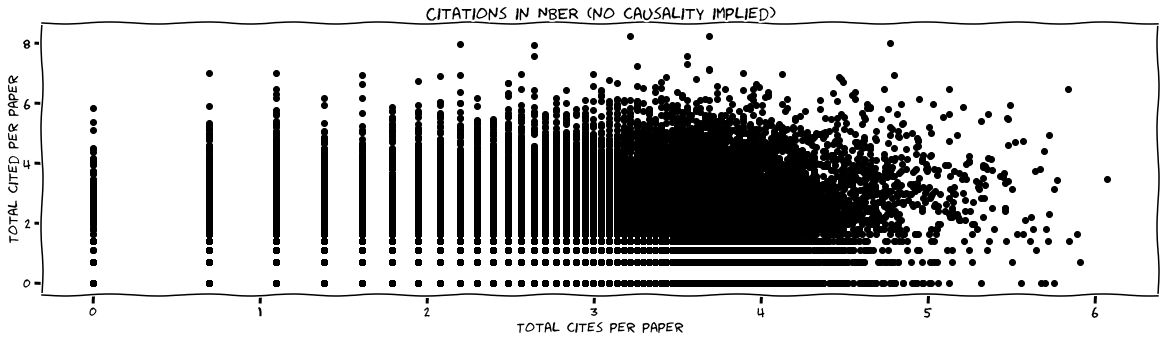

In [11]:
nber_paper.citation(repec)

What about the distributions? Total cites seem to be more normally distributed than total cited by (both log-scaled). In fact, it looks like that median cites are way more than median cited. Do you think that it makes sense? 

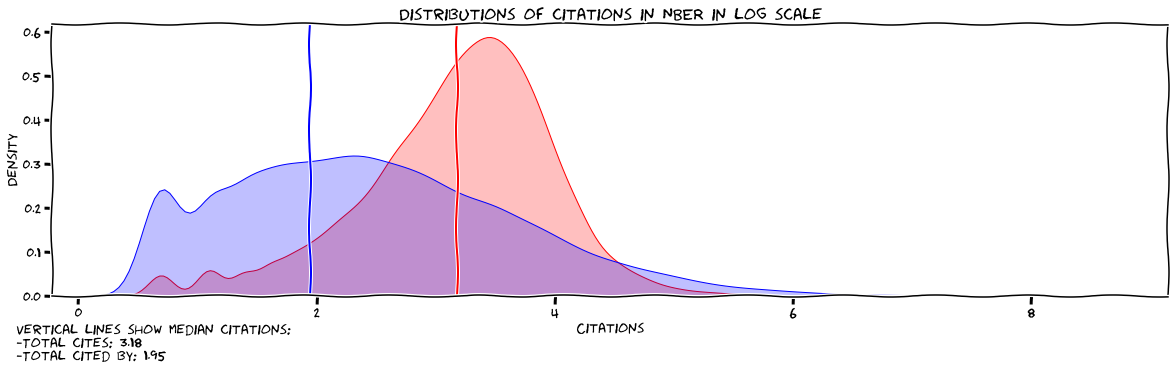

In [12]:
nber_paper.citation_density(repec)

# Popularity by topics

Like music or movies, economics also have genres or topics. Fortunately, NBER covers various topics. Each paper can contain more than one topics. So, in graph below I present the distinct numbers of times each topic appears in the papers. We can see below five most popular topics in NBER.

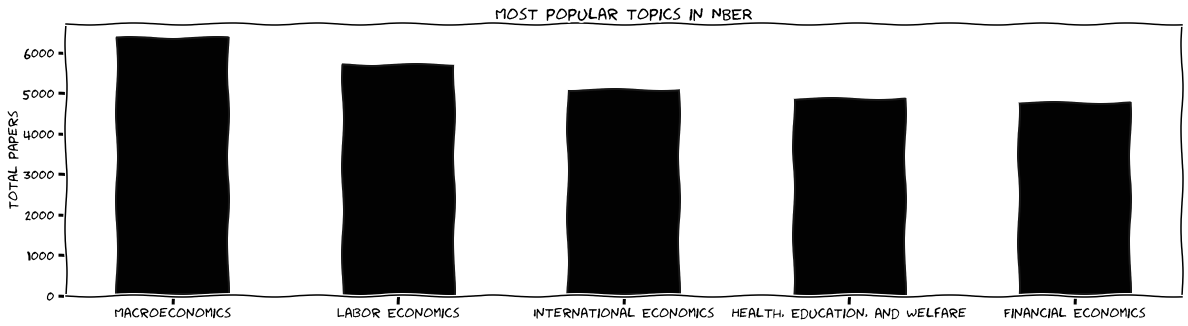

In [13]:
nber_paper.bar_plot(nber_paper.top_five(nber), 'Topics', 'Most popular topics in NBER', 'topics')

We can also see the trends of these five topics from year to year. 📈📉

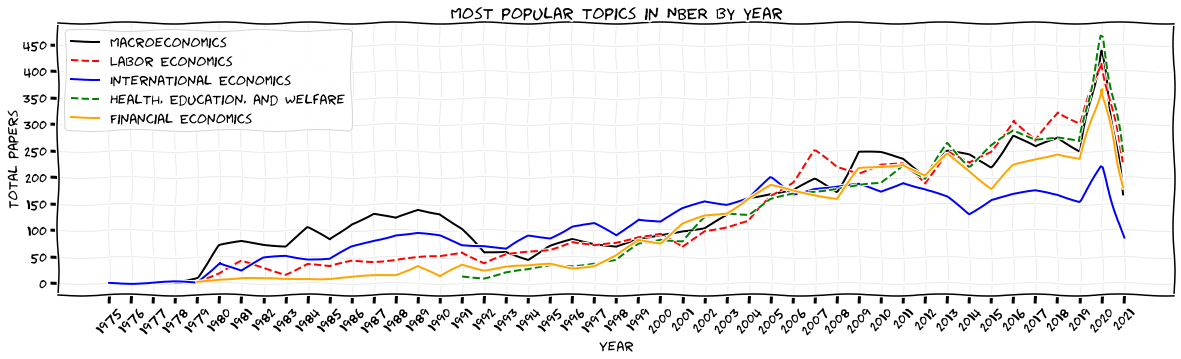

In [14]:
nber_paper.top_five_trends(nber, 'topics', 'Most popular topics in NBER by year', 50)

# Prolific economists

Lastly I would like to highlight the most prolific economists. Can you imagine how these economists publish so many papers? What factors that contribute to their dedication in economics? I am also curious whether there's any disparity between gender. Below, we can see that all of them are men. 🤷🏻‍♀️

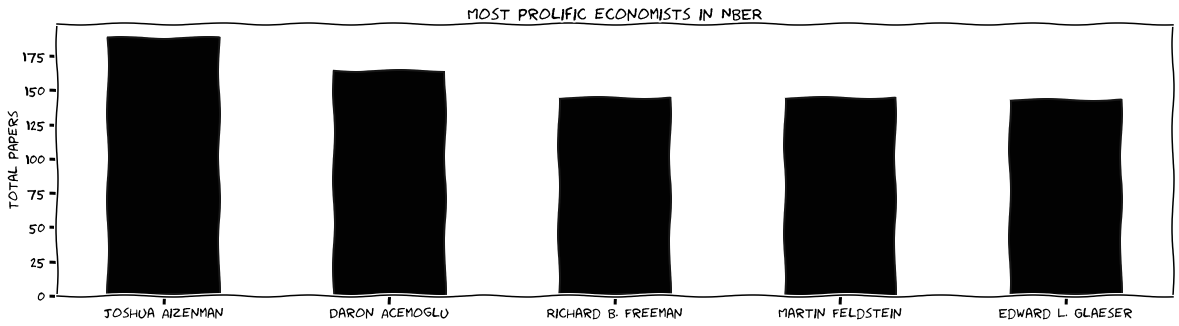

In [15]:
nber_paper.bar_plot(nber_paper.top_five(nber, 'citation_author'), 'Economists', 'Most prolific economists in NBER', 'citation_author')

These prolific economists happen to be seniors, whose career started since in the 1970s-80s, yet they are stil productive in present days (except Martin Feldstein, who died in 2019).

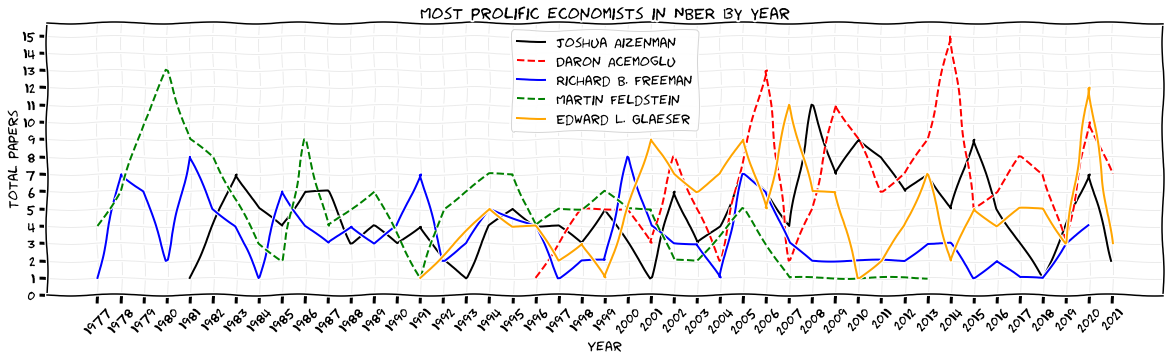

In [16]:
nber_paper.top_five_trends(nber, 'citation_author', 'Most prolific economists in NBER by year', 1)

# Outro

If you have reached this point, I would like to say thank you and hopefully you enjoy this as much as I do in creating this stuff 😎. Feel free to file issues if you happen to find bugs in the code or if you have any questions [<strong>here<strong>](https://github.com/ledwindra/nber/issues) 💻❓. Cheers! 🍻